##### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

##### Read data from github

In [2]:
url = "https://raw.githubusercontent.com/shimabang/Datasets/main/Algerian_forest_fires_dataset_UPDATE%20(1).csv"
df=pd.read_csv(url,header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


##### Checking Null Values

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


##### Drop rows which have null

In [6]:
df.drop([122,123, 167],axis=0, inplace=True)
df = df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


##### Show all the columns

In [7]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

##### Column name having extra space

In [8]:
cols_with_space = [col for col in df.columns if ' ' in col]
cols_with_space

[' RH', ' Ws', 'Rain ', 'Classes  ']

##### Remove extra space in column names

In [9]:
df.columns = [c.replace(' ', '') for c in df.columns]
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

##### Function to remove extra space in the data

In [10]:
df['Classes'] = df['Classes'].apply(lambda sp : sp.replace(" ", ""))

##### Drop extra index column, which was created for reset_index

In [11]:
df.drop(['index'],axis=1, inplace=True)

##### Create data feature with the help of day, month and year feature and converted to datetime

In [12]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

##### Drop day, month and year feature

In [13]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

##### Imputation of date based on temperature. Usually in summer temperature is more and in winter it is less. So, we have categorized it based on month

In [14]:
def date_imputation(x):
    if (x >= pd.to_datetime('2012-07-01')) and (x <= pd.to_datetime('2012-09-01')):
        return 1
    else:
        return 0
df['date'] = df['date'].apply(date_imputation)

In [15]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
239,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,notfire,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,0


##### Counting the values of fire and not fire

In [16]:
df['date'].value_counts()

1    125
0    118
Name: date, dtype: int64

##### Create one region,just to identify the two region i.e.,Sidi-Bel Abbes Region and Bejaia Region

In [17]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

##### check null values in all the features

In [18]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

##### Map classes feature as 1 and 0 for fire and not fire respectively

In [19]:
df['Classes'] = df['Classes'].map({"fire":1, "notfire":0})

In [20]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

##### Check duplictes values in all the column

In [21]:
df.duplicated().value_counts()

False    243
dtype: int64

In [22]:
df.columns.duplicated().sum()

0

##### Check data types of all the features

In [23]:
df.dtypes

Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
date             int64
Region         float64
dtype: object

##### Convert features to its logical datatypes

In [24]:
df[["Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"]] = df[["Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype("float32")

In [25]:
df[['Classes', 'date', 'Region']] = df[['Classes', 'date', 'Region']].astype("unicode_")

##### Converted datatpyes

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float32
 1   RH           243 non-null    float32
 2   Ws           243 non-null    float32
 3   Rain         243 non-null    float32
 4   FFMC         243 non-null    float32
 5   DMC          243 non-null    float32
 6   DC           243 non-null    float32
 7   ISI          243 non-null    float32
 8   BUI          243 non-null    float32
 9   FWI          243 non-null    float32
 10  Classes      243 non-null    object 
 11  date         243 non-null    object 
 12  Region       243 non-null    object 
dtypes: float32(10), object(3)
memory usage: 15.3+ KB


##### Check unique values in all the features

In [27]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
date             2
Region           2
dtype: int64

##### Segregate categorical feature from the dataset

In [28]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['Classes', 'date', 'Region']

In [29]:
for feature in categorical_feature:
    print(df.groupby(feature)[feature].value_counts())

Classes  Classes
0        0          106
1        1          137
Name: Classes, dtype: int64
date  date
0     0       118
1     1       125
Name: date, dtype: int64
Region  Region
0.0     0.0       122
1.0     1.0       121
Name: Region, dtype: int64


##### Segregate numerical feature from the dataset

In [30]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes=='float32']
numerical_feature

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [31]:
for feature in numerical_feature:
    print(df.groupby(feature)[feature].value_counts())

Temperature  Temperature
22.0         22.0            2
24.0         24.0            3
25.0         25.0            6
26.0         26.0            5
27.0         27.0            8
28.0         28.0           15
29.0         29.0           18
30.0         30.0           22
31.0         31.0           25
32.0         32.0           21
33.0         33.0           23
34.0         34.0           24
35.0         35.0           29
36.0         36.0           21
37.0         37.0            8
38.0         38.0            3
39.0         39.0            6
40.0         40.0            3
42.0         42.0            1
Name: Temperature, dtype: int64
RH    RH  
21.0  21.0    1
24.0  24.0    1
26.0  26.0    1
29.0  29.0    1
31.0  31.0    1
             ..
86.0  86.0    3
87.0  87.0    4
88.0  88.0    3
89.0  89.0    3
90.0  90.0    1
Name: RH, Length: 62, dtype: int64
Ws    Ws  
6.0   6.0      1
8.0   8.0      1
9.0   9.0      2
10.0  10.0     3
11.0  11.0     7
12.0  12.0     7
13.0  13.0    30
14

# Graphical Analysis

##### Checking distribution of Continuous numerical features

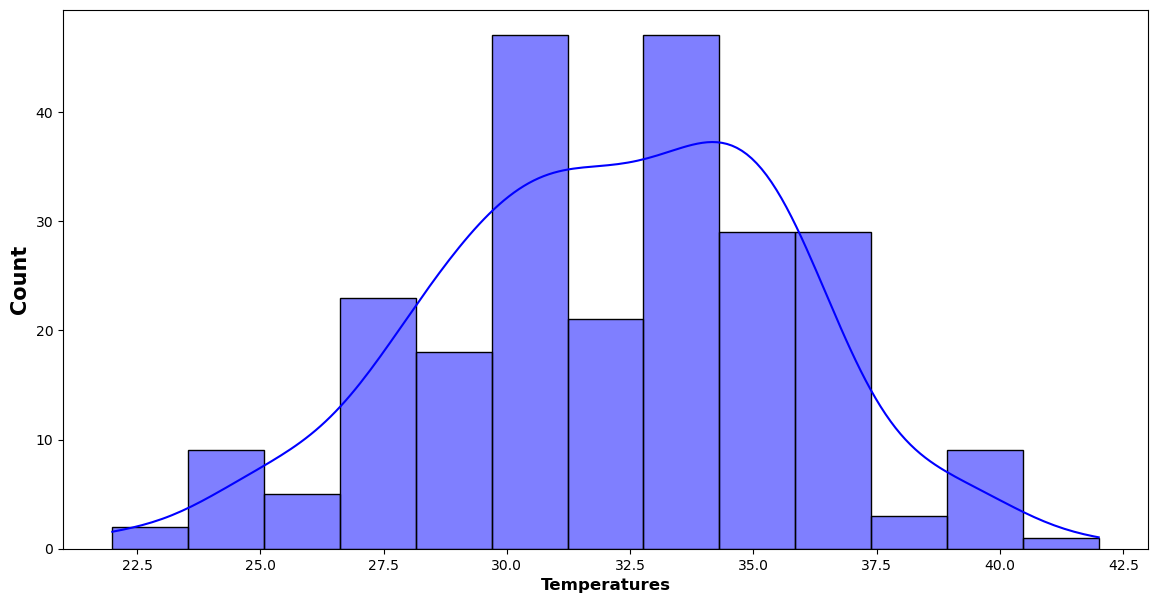

In [32]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()

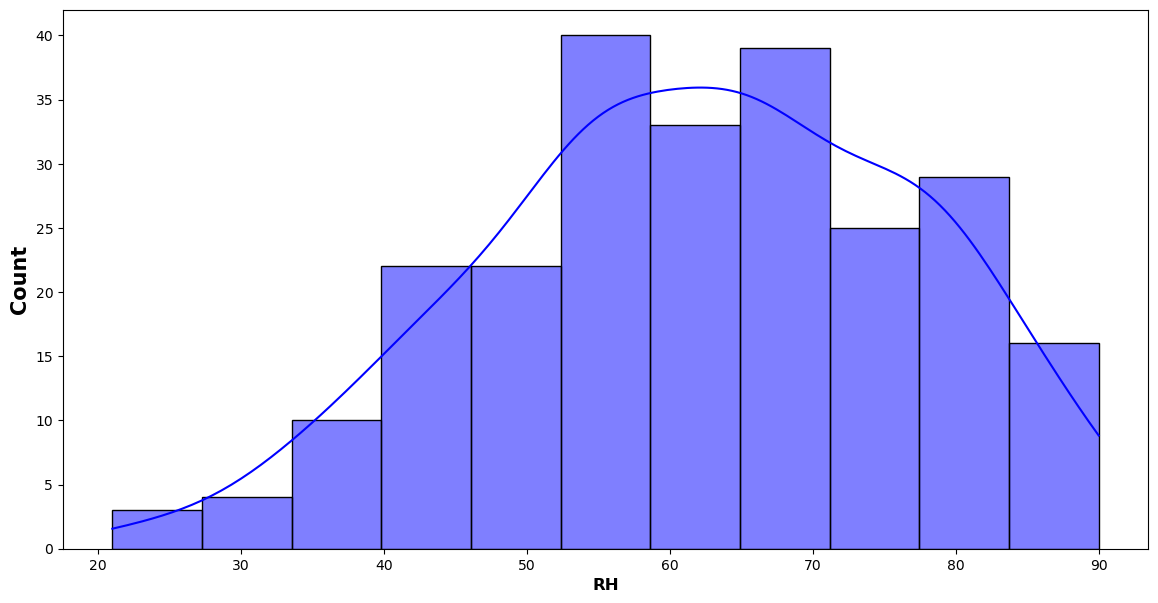

In [33]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.RH, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("RH", weight="bold", fontsize=12)
plt.show()

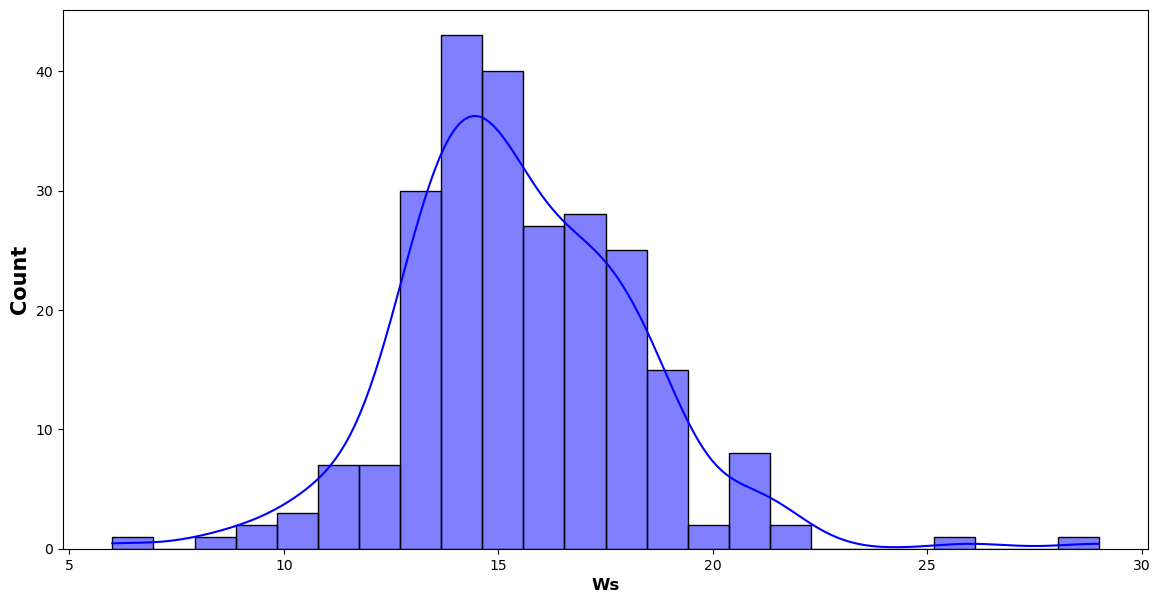

In [34]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Ws, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Ws", weight="bold", fontsize=12)
plt.show()

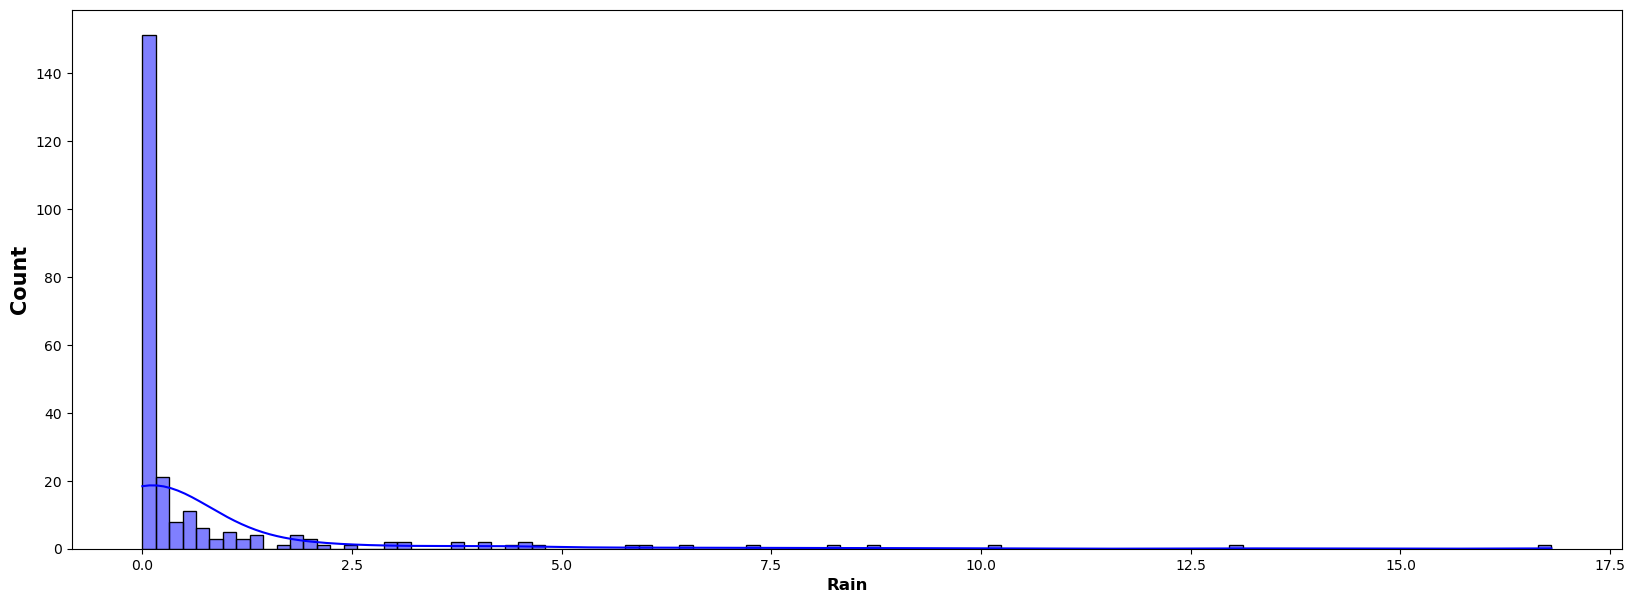

In [35]:
plt.subplots(figsize=(20,7))
sns.histplot(x=df.Rain, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Rain", weight="bold", fontsize=12)
plt.show()

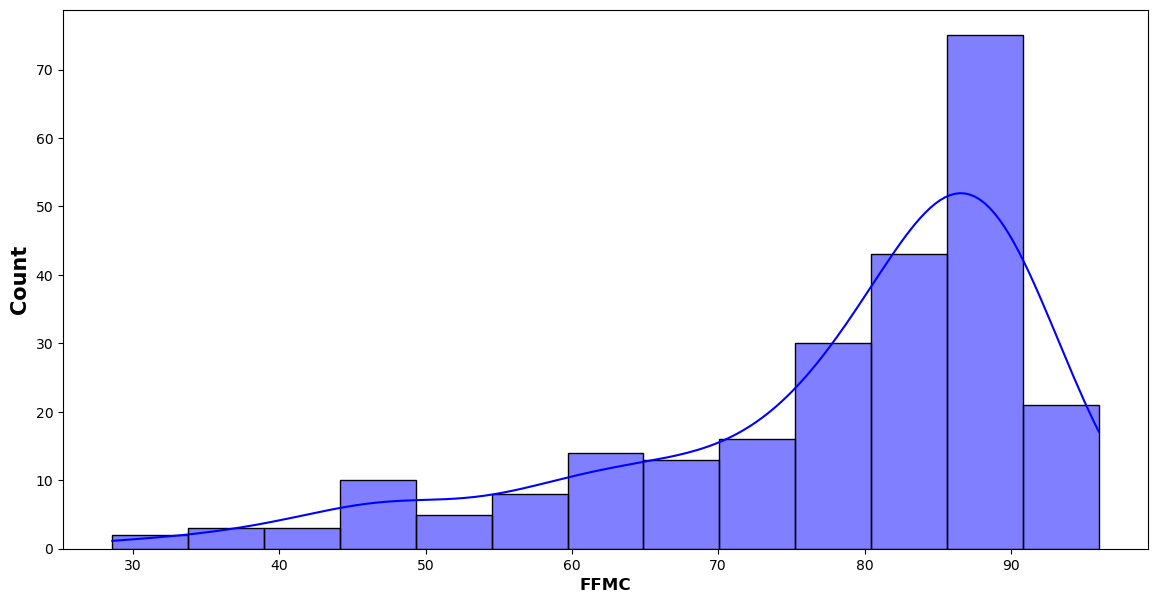

In [36]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.FFMC, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("FFMC", weight="bold", fontsize=12)
plt.show()

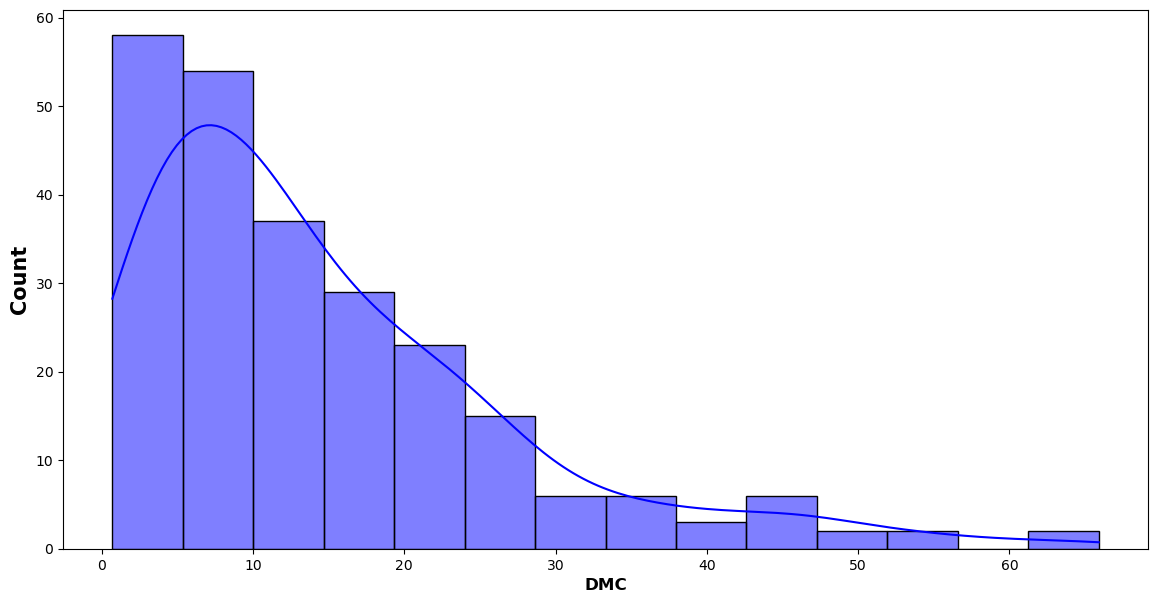

In [37]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.DMC, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("DMC", weight="bold", fontsize=12)
plt.show()

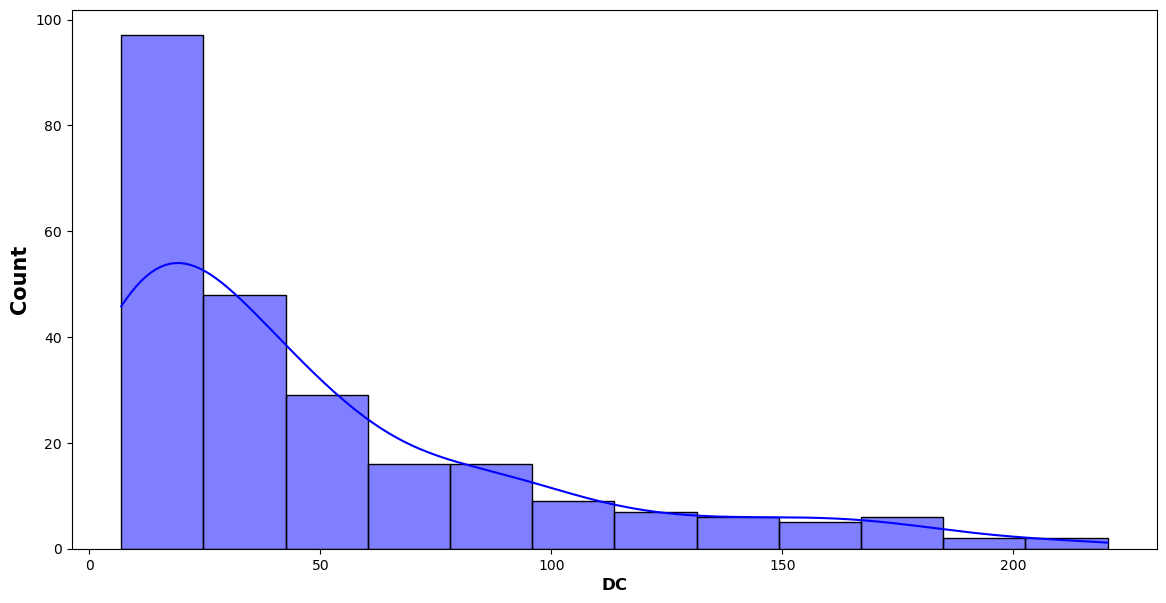

In [38]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.DC, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("DC", weight="bold", fontsize=12)
plt.show()

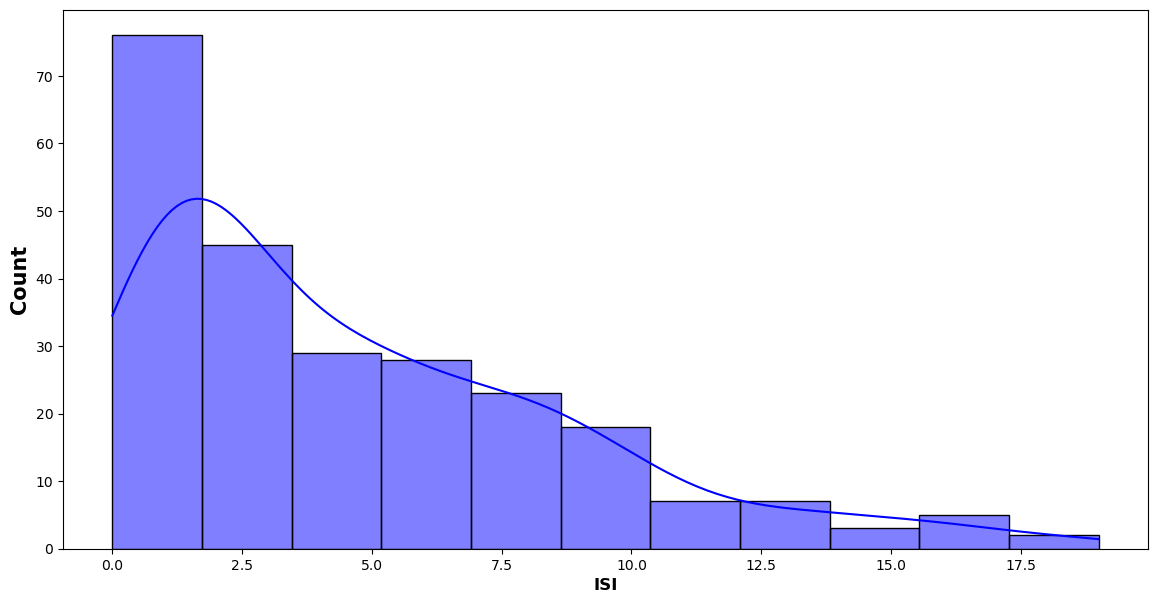

In [39]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.ISI, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("ISI", weight="bold", fontsize=12)
plt.show()

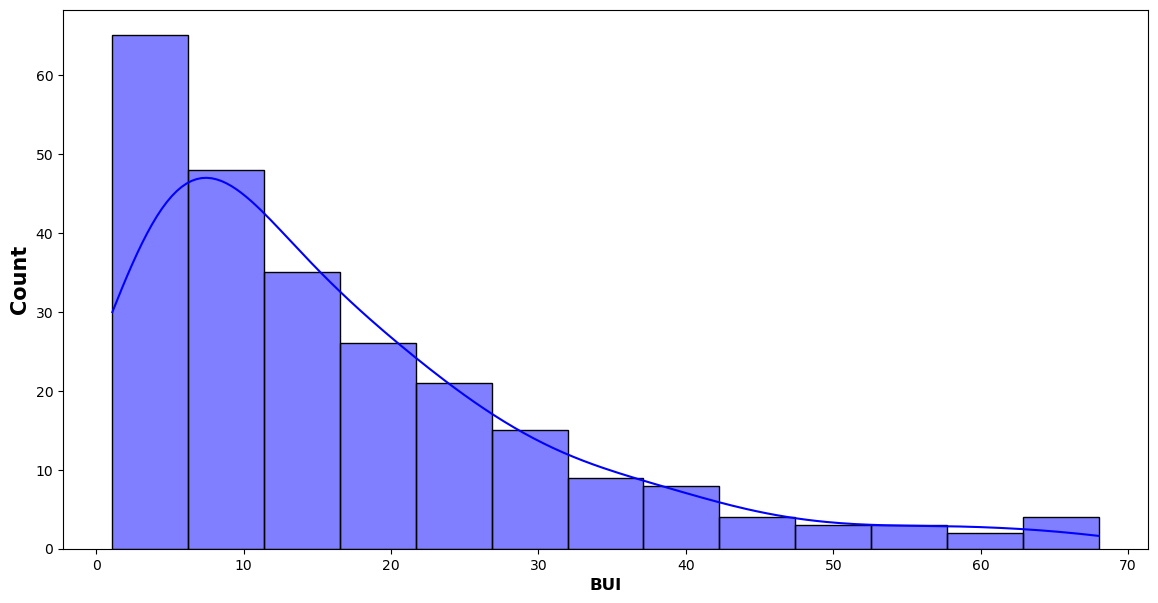

In [40]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.BUI, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("BUI", weight="bold", fontsize=12)
plt.show()

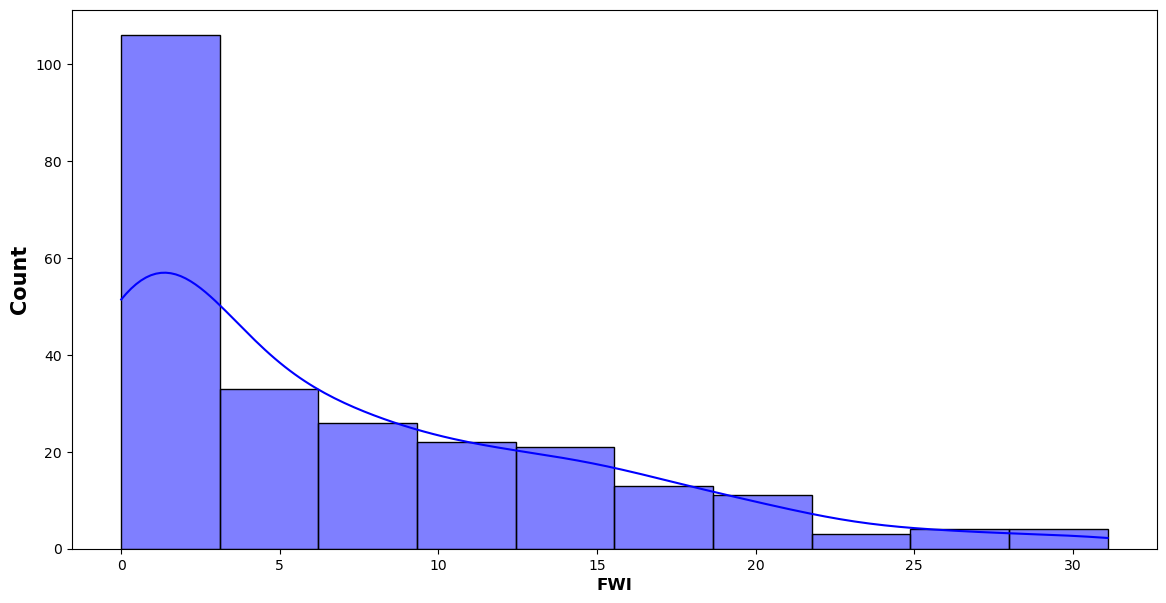

In [41]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.FWI, ec = "black", color='blue', kde=True)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("FWI", weight="bold", fontsize=12)
plt.show()

## 5) Outlier Handling

##### Before Removing Outliers

Text(0.5, 1.0, 'Before Removing Outliers')

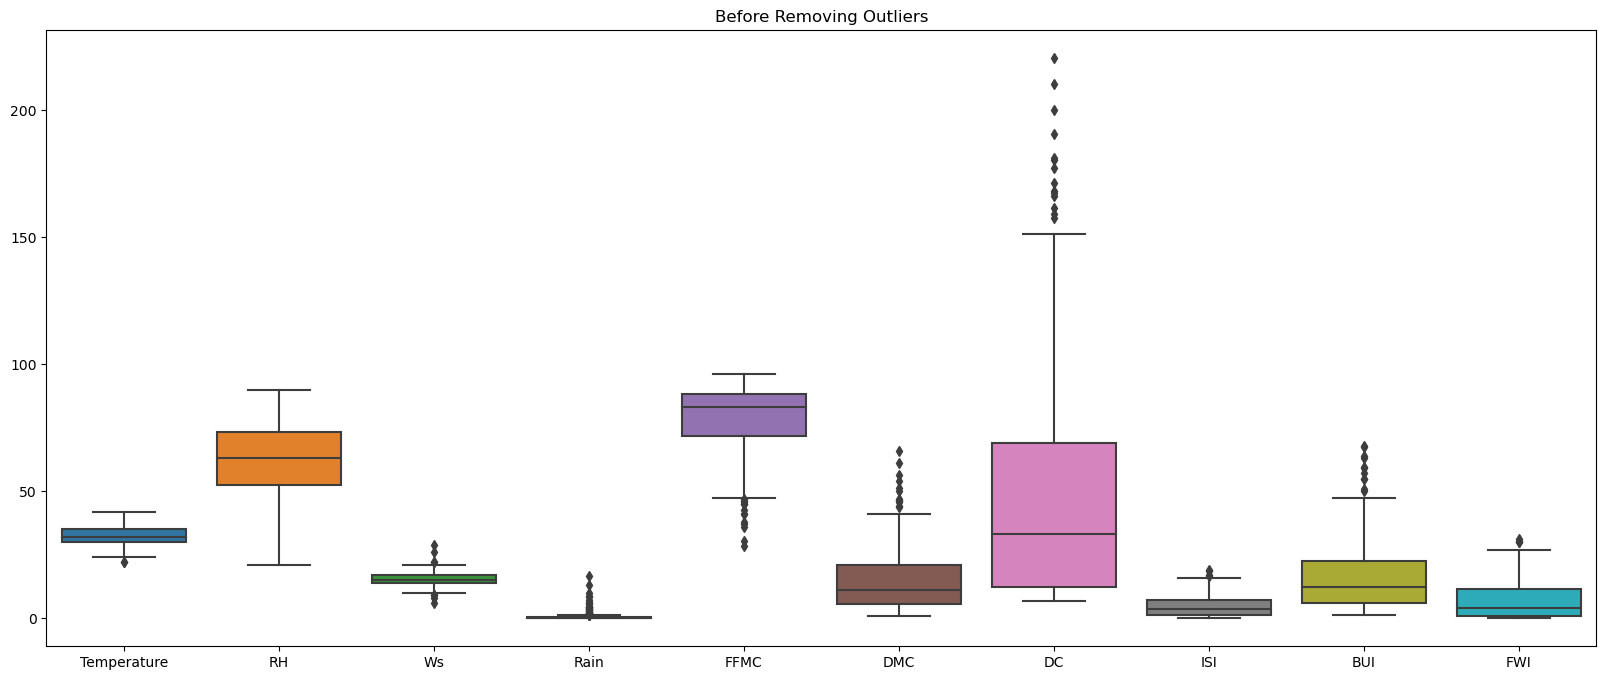

In [42]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

##### Function to find upper and lower boundaries

In [43]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
    return upper_boundary, lower_boundary

In [44]:
outliers_columns = ['Temperature','Ws','Rain','FFMC','DMC','ISI','BUI', 'FWI']
for i in outliers_columns:
    upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
    outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
    outliers_df = df.loc[outliers, i]
    df_trimed= df.loc[~outliers, i]
    df[i] = df_trimed

##### After removal of outliers

Text(0.5, 1.0, 'After Removing Outliers')

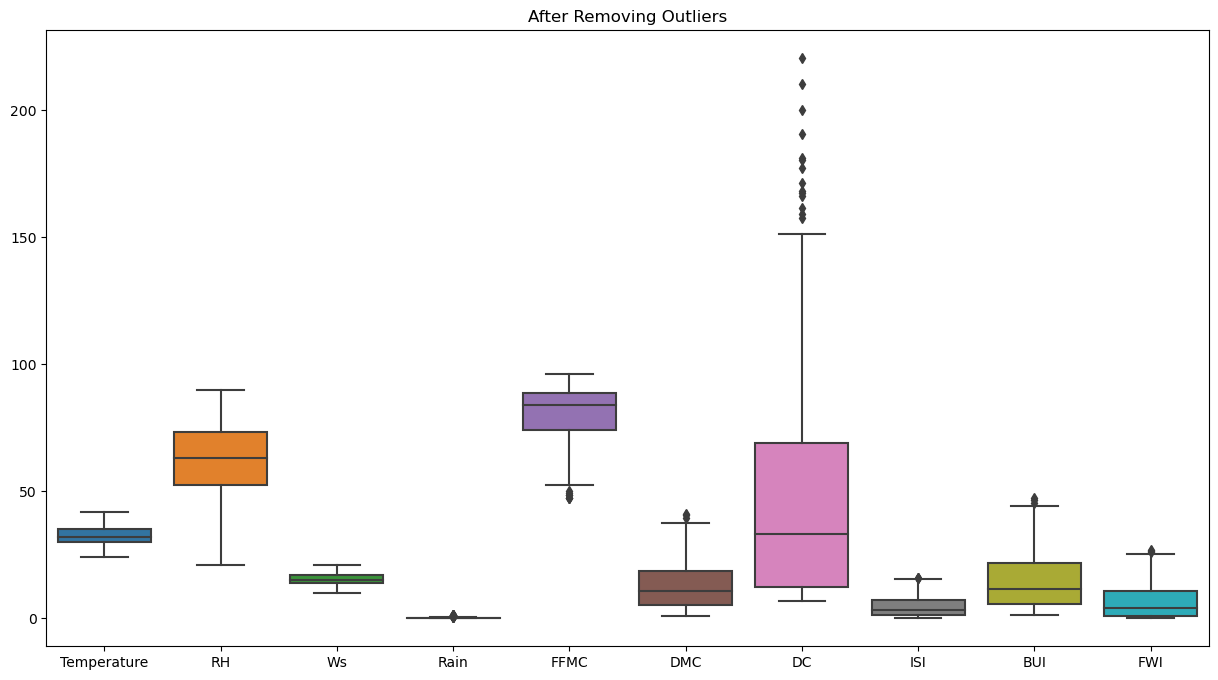

In [45]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

##### Outliers Handling For DC feature

Text(0.5, 1.0, 'Before Removing Outliers')

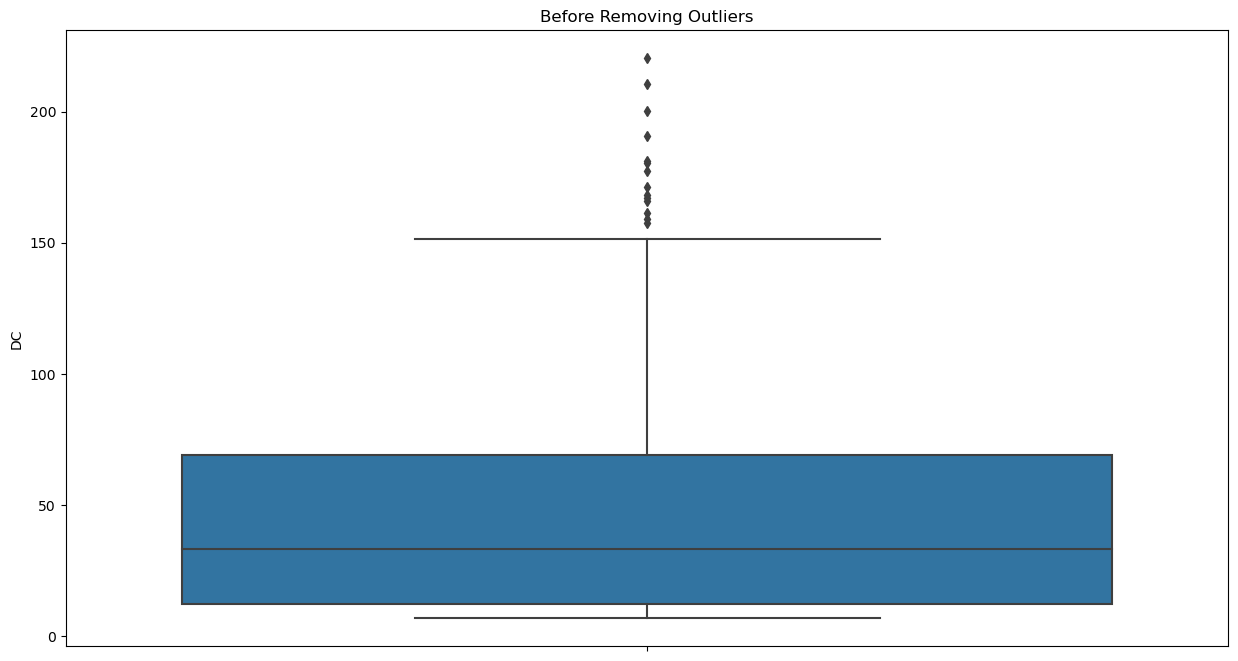

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, y= 'DC')
plt.title("Before Removing Outliers")

##### Check null value in each column

In [47]:
df.isnull().sum()

Temperature     2
RH              0
Ws              8
Rain           35
FFMC           13
DMC            12
DC              0
ISI             4
BUI            11
FWI             4
Classes         0
date            0
Region          0
dtype: int64

##### Imputation of null value with the mean

In [48]:
df.fillna(df.mean().round(1), inplace=True)

##### Check null value of each column

In [49]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

## 6 Statistical Analysis

##### Heatmap to check correlation between different variable

<AxesSubplot: >

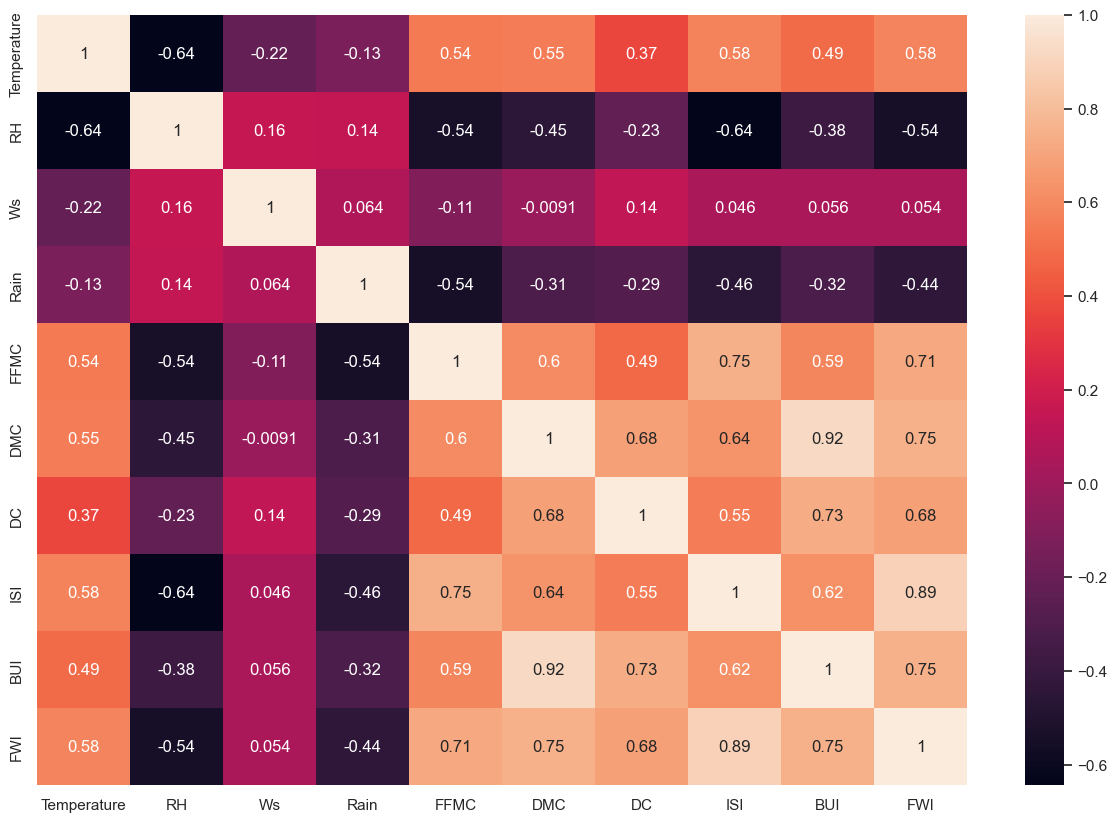

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

## 7 Model Building

In [51]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'date', 'Region'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float32
 1   RH           243 non-null    float32
 2   Ws           243 non-null    float32
 3   Rain         243 non-null    float32
 4   FFMC         243 non-null    float32
 5   DMC          243 non-null    float32
 6   DC           243 non-null    float32
 7   ISI          243 non-null    float32
 8   BUI          243 non-null    float32
 9   FWI          243 non-null    float32
 10  Classes      243 non-null    object 
 11  date         243 non-null    object 
 12  Region       243 non-null    object 
dtypes: float32(10), object(3)
memory usage: 15.3+ KB


##### Regression PLot

<AxesSubplot: xlabel='RH', ylabel='Temperature'>

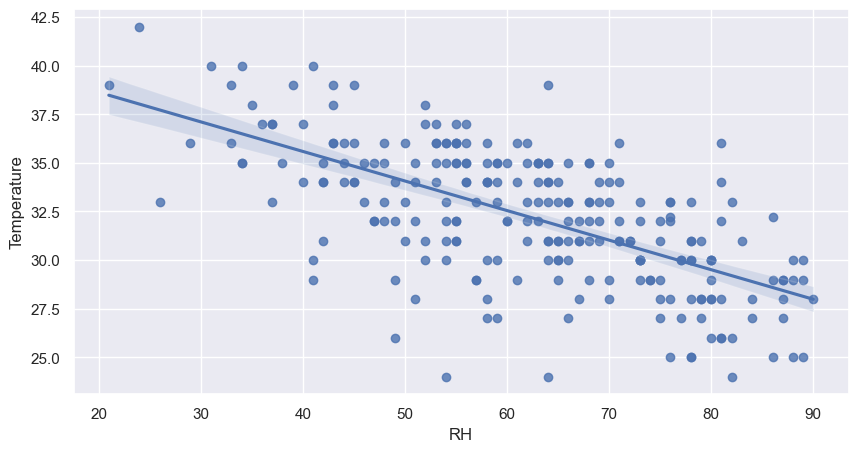

In [53]:
plt.figure(figsize=(10, 5))
sns.regplot(x='RH',y='Temperature',data=df)

<AxesSubplot: xlabel='Ws', ylabel='Temperature'>

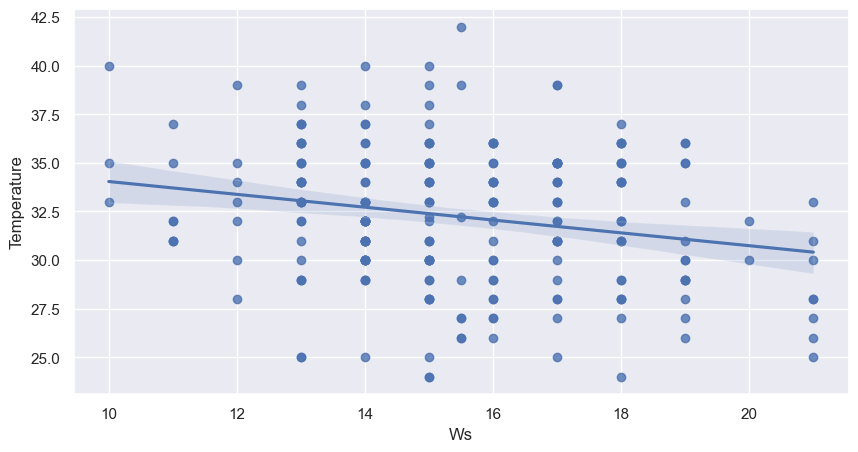

In [54]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Ws',y='Temperature',data=df)

<AxesSubplot: xlabel='Rain', ylabel='Temperature'>

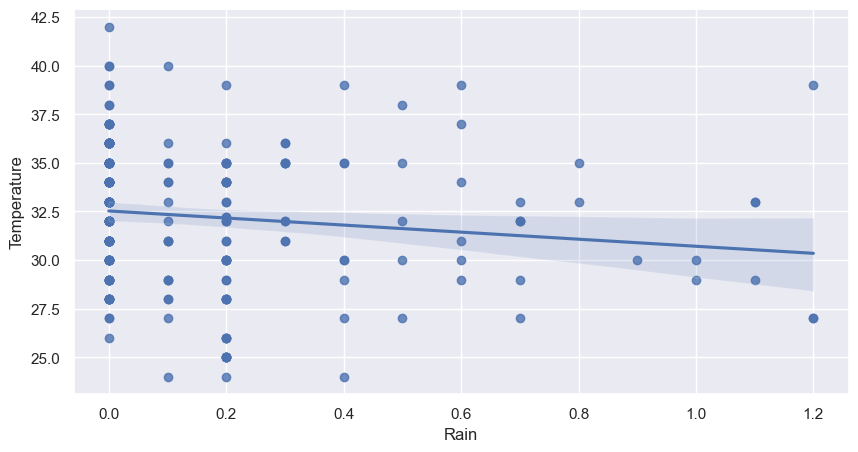

In [55]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Rain',y='Temperature',data=df)

<AxesSubplot: xlabel='FFMC', ylabel='Temperature'>

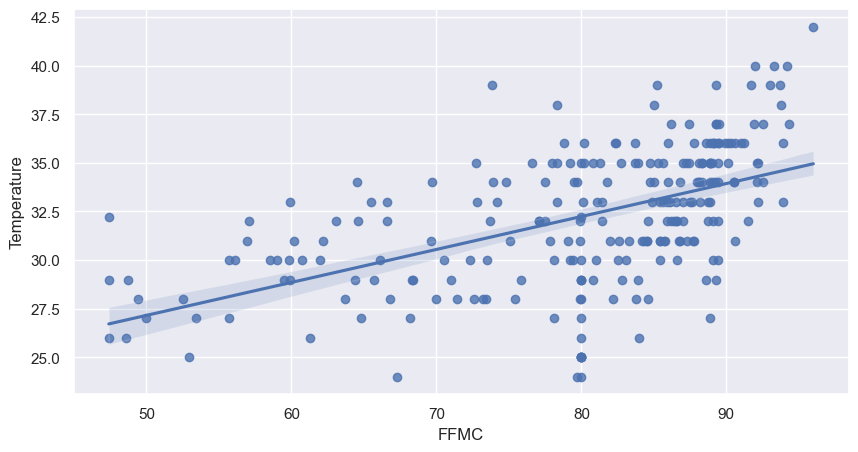

In [56]:
plt.figure(figsize=(10, 5))
sns.regplot(x='FFMC',y='Temperature',data=df)

<AxesSubplot: xlabel='DMC', ylabel='Temperature'>

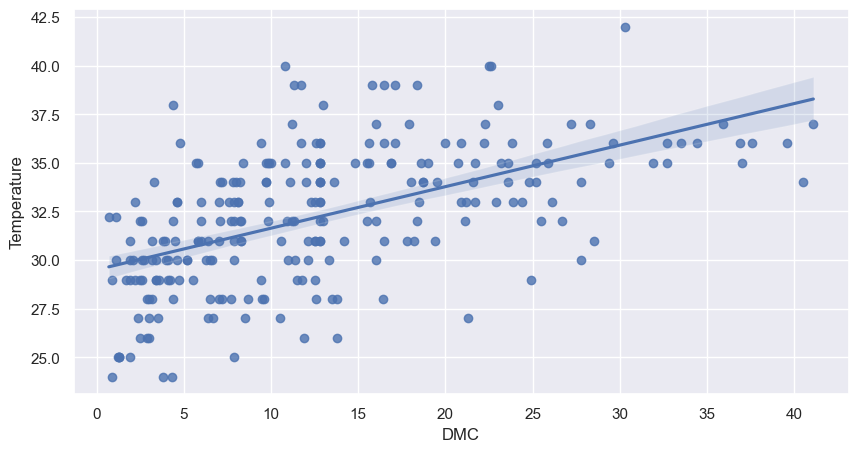

In [57]:
plt.figure(figsize=(10, 5))
sns.regplot(x='DMC',y='Temperature',data=df)

<AxesSubplot: xlabel='DC', ylabel='Temperature'>

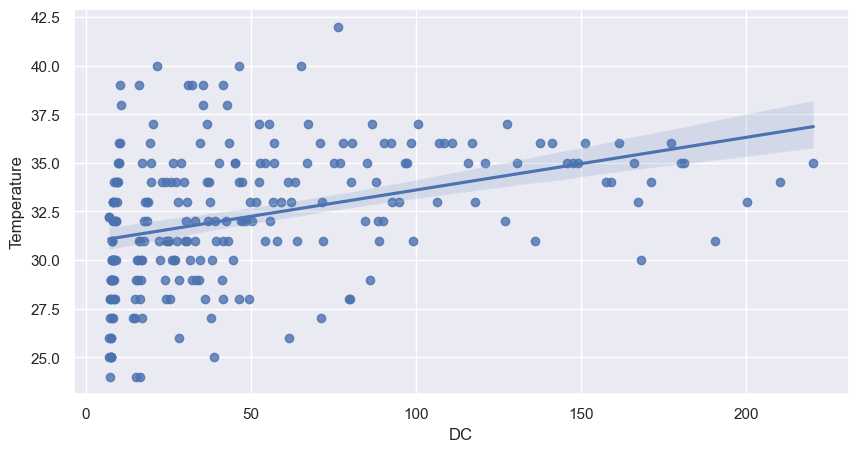

In [58]:
plt.figure(figsize=(10, 5))
sns.regplot(x='DC',y='Temperature',data=df)

<AxesSubplot: xlabel='ISI', ylabel='Temperature'>

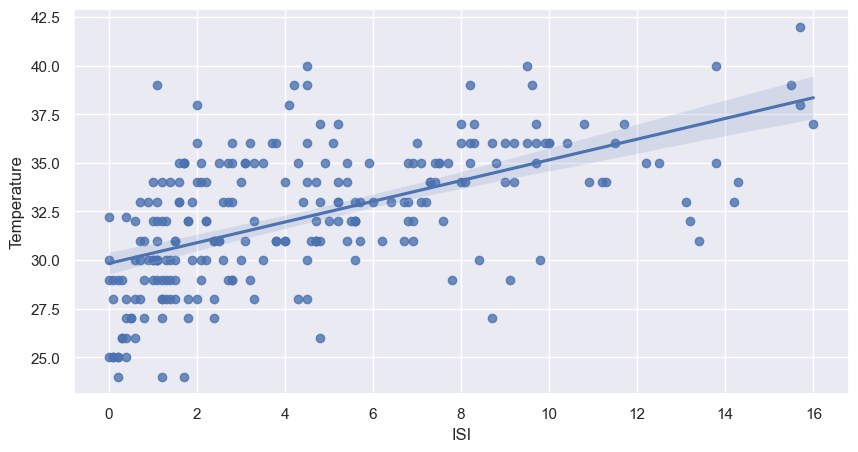

In [59]:
plt.figure(figsize=(10, 5))
sns.regplot(x='ISI',y='Temperature',data=df)

<AxesSubplot: xlabel='FWI', ylabel='Temperature'>

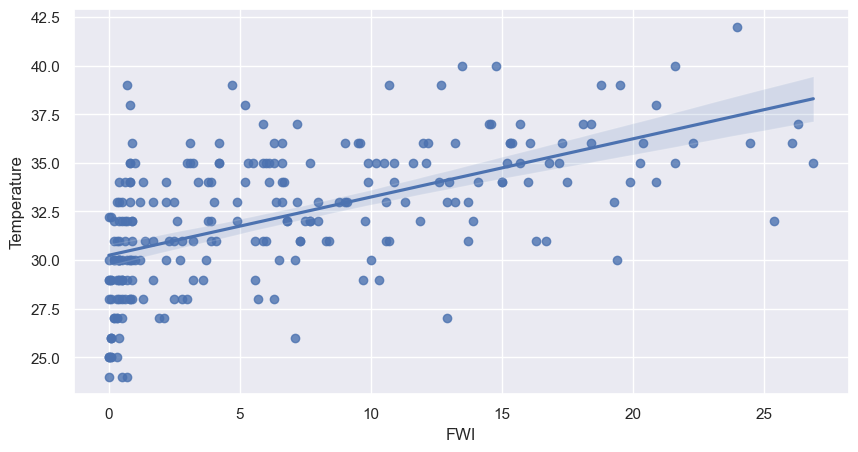

In [60]:
plt.figure(figsize=(10, 5))
sns.regplot(x='FWI',y='Temperature',data=df)

##### Segregate dependent and independent feature

In [61]:
X= df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
'FWI', 'Classes', 'Region', 'date']]
y=df[['Temperature']]

In [62]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region,date
0,57.0,18.0,0.0,65.699997,3.4,1.3,7.6,0.5,0,0.0,0
1,61.0,13.0,0.2,64.400002,4.1,1.0,7.6,0.4,0,0.0,0
2,82.0,15.5,0.2,80.000000,2.5,0.3,7.1,0.1,0,0.0,0
3,89.0,13.0,0.2,80.000000,1.3,0.0,6.9,0.0,0,0.0,0
4,77.0,16.0,0.0,64.800003,3.0,1.2,14.2,0.5,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65.0,14.0,0.0,85.400002,16.0,4.5,44.5,6.5,1,1.0,0
239,87.0,15.0,0.2,80.000000,6.5,0.1,8.0,0.0,0,1.0,0
240,87.0,15.5,0.5,80.000000,3.5,0.4,7.9,0.2,0,1.0,0
241,54.0,18.0,0.1,79.699997,4.3,1.7,15.2,0.7,0,1.0,0


##### splitting the data into training and test dataset

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=10)

##### Scaling the feature

In [64]:
scaler=StandardScaler()

In [65]:
X_train_scaled=scaler.fit_transform(X_train)

In [66]:
X_test_scaled=scaler.transform(X_test)

In [67]:
X_train_scaled

array([[ 0.06835876,  1.09629088, -0.6252181 , ...,  0.90566259,
        -1.01242284, -1.02500386],
       [ 0.99672801, -0.60729783,  0.09824856, ..., -1.10416397,
        -1.01242284, -1.02500386],
       [ 0.53254338,  0.6703937 , -0.6252181 , ...,  0.90566259,
         0.9877296 ,  0.97560608],
       ...,
       [-2.45150064, -1.033195  , -0.6252181 , ...,  0.90566259,
         0.9877296 , -1.02500386],
       [ 0.06835876, -0.60729783, -0.6252181 , ..., -1.10416397,
         0.9877296 , -1.02500386],
       [ 1.0630401 , -1.45909218, -0.6252181 , ..., -1.10416397,
        -1.01242284, -1.02500386]])

In [68]:
X_test_scaled

array([[ 4.66231295e-01, -6.07297826e-01, -6.25218097e-01,
         2.62358469e-01, -3.53268054e-01, -3.28482940e-01,
        -3.03195196e-01, -4.34732018e-01,  9.05662586e-01,
        -1.01242284e+00,  9.75606083e-01],
       [-9.26322582e-01,  1.52218806e+00, -6.25218097e-01,
         7.87074466e-01, -1.24481078e-01,  1.23976895e+00,
        -3.17928102e-01,  6.04145439e-01,  9.05662586e-01,
         9.87729597e-01, -1.02500386e+00],
       [-4.62137956e-01,  2.44496527e-01, -6.25218097e-01,
         8.14215246e-01,  1.21555660e+00,  1.00054394e+00,
         1.80888095e-01,  1.05380874e+00,  9.05662586e-01,
         9.87729597e-01,  9.75606083e-01],
       [ 1.19566428e+00,  2.37398241e+00,  9.82485567e-02,
        -2.83165940e+00, -1.05052343e+00, -1.07273804e+00,
        -8.58838597e-01, -9.77429159e-01, -1.10416397e+00,
        -1.01242284e+00, -1.02500386e+00],
       [ 1.12935219e+00, -6.07297826e-01,  9.82485567e-02,
        -2.82261236e+00, -1.13768035e+00, -1.09931858e+00,
  

## 8 Linear Regression Model

In [69]:
regression=LinearRegression()

In [70]:
pd.DataFrame(X_train).isnull().sum()

RH         0
Ws         0
Rain       0
FFMC       0
DMC        0
ISI        0
DC         0
FWI        0
Classes    0
Region     0
date       0
dtype: int64

In [71]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [72]:
print("Co-efficients of independent features is", regression.coef_)

Co-efficients of independent features is [[-1.53397174 -0.88135365  0.22086335 -0.15458541  0.36641038  0.03464913
  -0.00295544  0.11624985  0.49985614  0.00710352  1.29881661]]


##### Prediction of test data

In [73]:
linear_reg_pred = regression.predict(X_test_scaled)

In [74]:
linear_reg_pred

array([[33.36359241],
       [31.2165512 ],
       [34.75834689],
       [26.30941265],
       [29.01865534],
       [34.71362648],
       [32.24191733],
       [35.79497813],
       [30.19628437],
       [32.58169721],
       [35.31319188],
       [34.15638401],
       [36.83457449],
       [32.93428614],
       [34.89756506],
       [31.65113596],
       [28.29983285],
       [36.46901286],
       [31.41590765],
       [29.18794024],
       [33.1491012 ],
       [34.32997007],
       [33.92878251],
       [33.52637365],
       [28.64002631],
       [31.19723149],
       [32.35005065],
       [29.46510879],
       [33.18691601],
       [31.82685093],
       [32.80709377],
       [32.25471541],
       [35.90817051],
       [31.24489435],
       [29.79549829],
       [28.31589137],
       [33.68218271],
       [30.74296199],
       [33.70340007],
       [34.71606951],
       [35.43320086],
       [33.58127187],
       [35.35218875],
       [33.87770317],
       [33.65386667],
       [38

In [75]:
residual_linear_reg=y_test - linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

## 8.1 Validation of Linear Regression assumptions

##### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

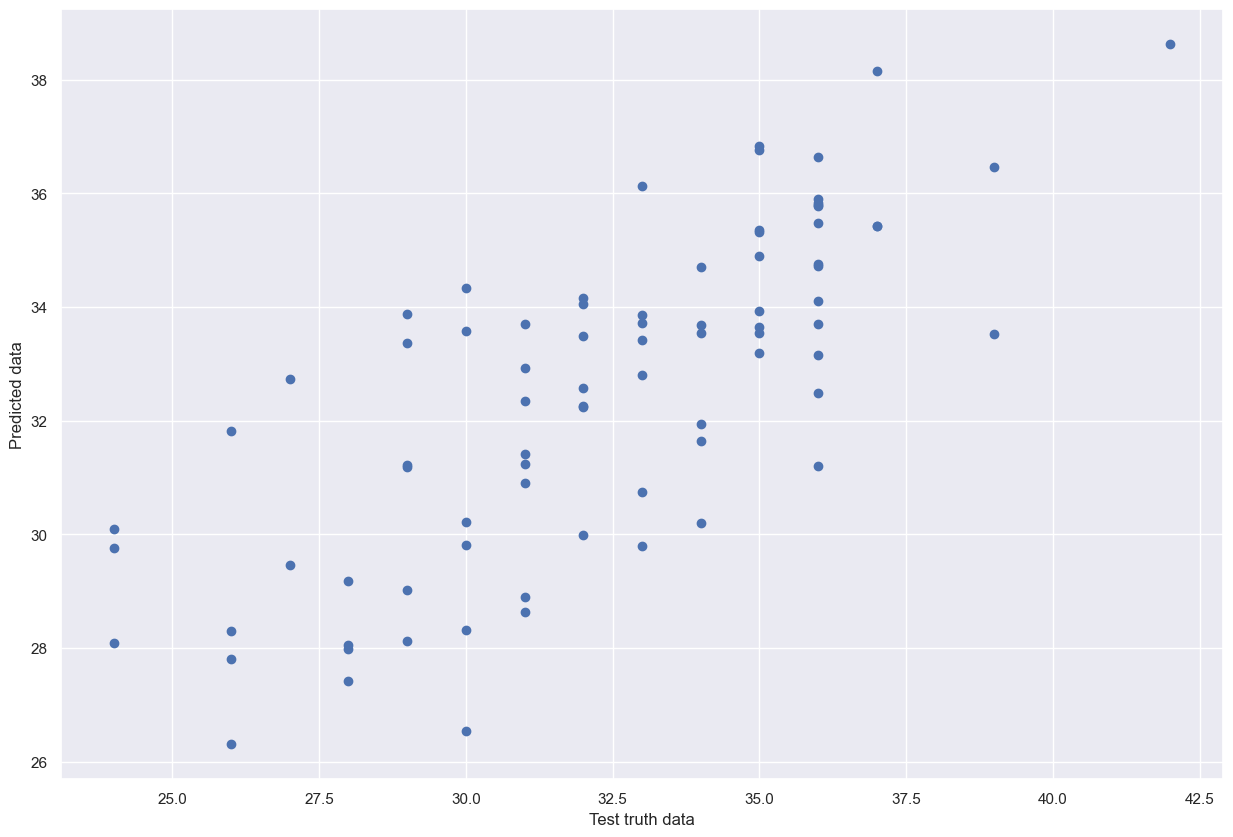

In [76]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

##### 2. Residual should be normally distributed

In [77]:
residuals = y_test - linear_reg_pred

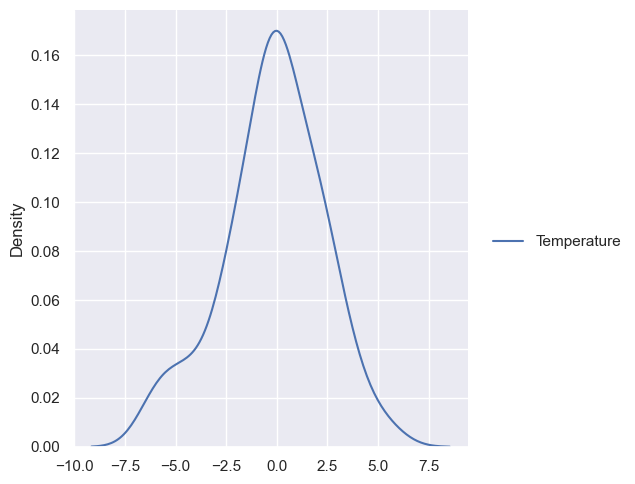

In [78]:
sns.displot(residuals,kind="kde")

##### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

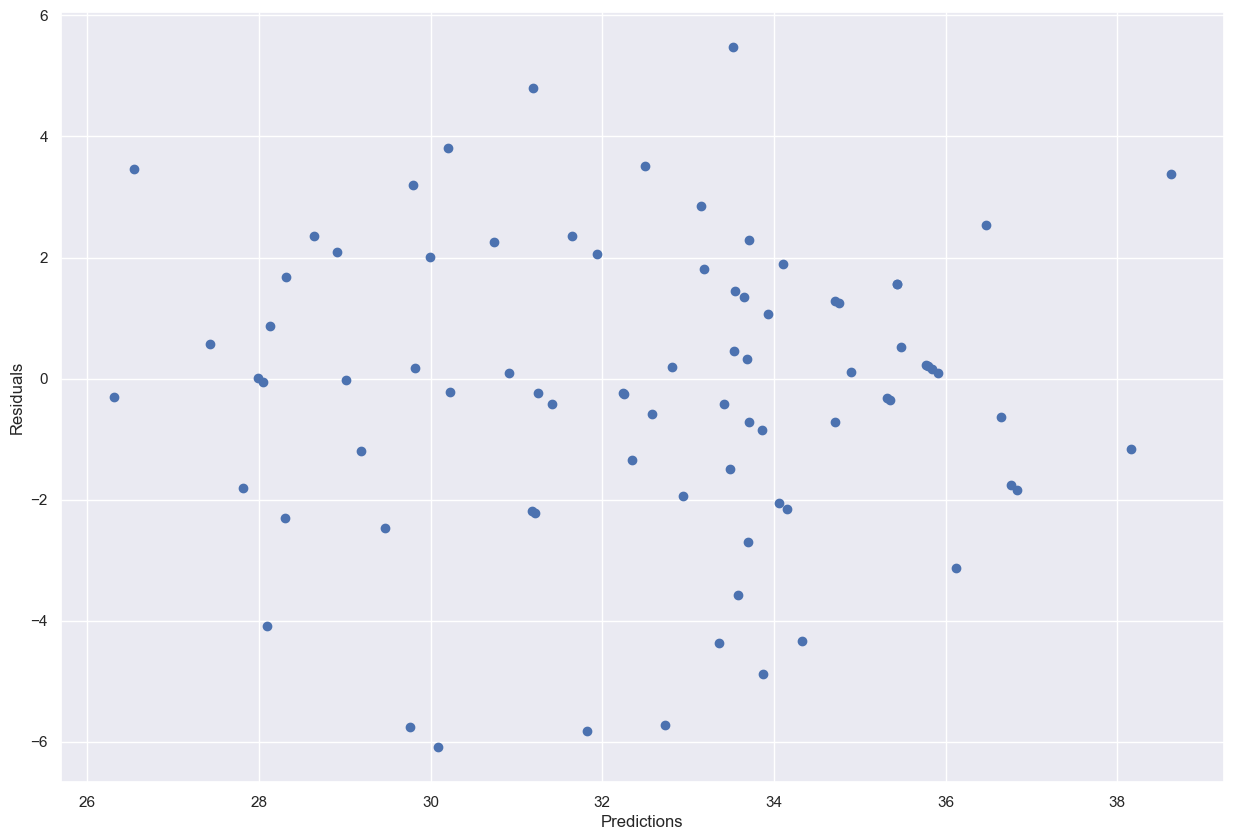

In [79]:
plt.scatter(x=linear_reg_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

##### 8.2 Cost Function Values

In [80]:
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 5.99
MAE :1.85
RMSE : 2.45


##### 8.3 Performance Metrics

In [81]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 56.693 % 
Adjusted R-Squared Accuracy : 49.79%


## 9 Ridge Regresion Model

In [82]:
ridge=Ridge()

In [83]:
ridge.fit(X_train_scaled,y_train)

Ridge()

In [84]:
print(ridge.coef_)

[[-1.5147371  -0.87684588  0.22386726 -0.1400546   0.36702812  0.04904817
  -0.00223179  0.11575724  0.48695873  0.01201093  1.2886066 ]]


##### Prediction of test data

In [85]:
ridge_pred=ridge.predict(X_test_scaled)

In [86]:
ridge_pred

array([[33.34019348],
       [31.23603283],
       [34.75848818],
       [26.30576343],
       [29.00980063],
       [34.71216787],
       [32.23170458],
       [35.79425411],
       [30.21945633],
       [32.5702567 ],
       [35.29275219],
       [34.1386642 ],
       [36.80491947],
       [32.9357405 ],
       [34.8704973 ],
       [31.66592775],
       [28.28334194],
       [36.43257368],
       [31.4122177 ],
       [29.16886517],
       [33.12117971],
       [34.30057319],
       [33.92534252],
       [33.52720854],
       [28.64916209],
       [31.21886022],
       [32.34274654],
       [29.48314226],
       [33.16947645],
       [31.79998987],
       [32.80084347],
       [32.25337229],
       [35.86325435],
       [31.25129254],
       [29.81022296],
       [28.32047708],
       [33.66444625],
       [30.75645894],
       [33.7029632 ],
       [34.67638642],
       [35.43141276],
       [33.58122076],
       [35.33426044],
       [33.8527365 ],
       [33.64263612],
       [38

### 9.1 Validation of Ridge Regression assumptions

##### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

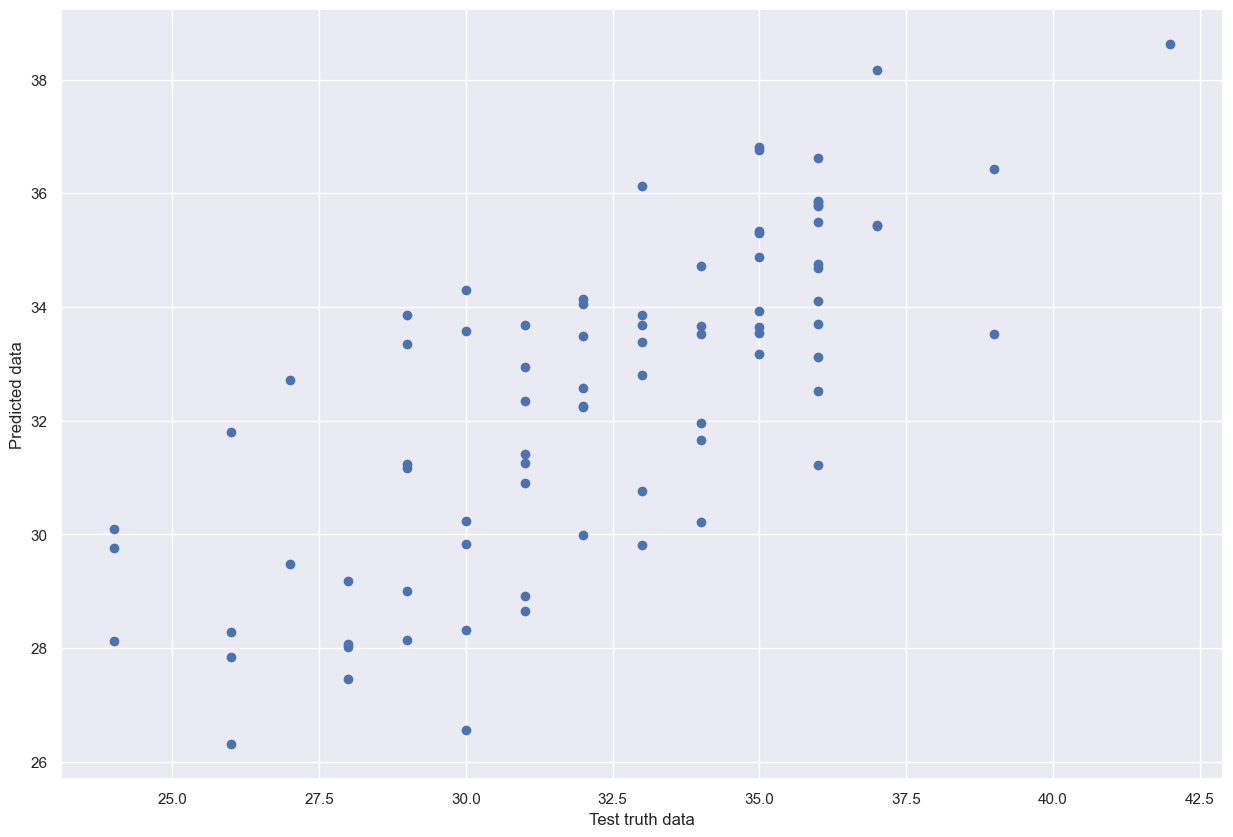

In [87]:
plt.scatter(x=y_test,y=ridge_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

##### 2. Residual should be normally distributed

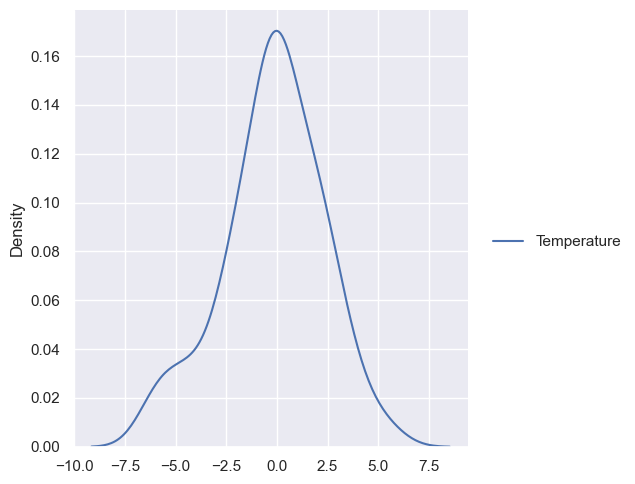

In [88]:
residuals1 = y_test - ridge_pred
sns.displot(residuals1,kind="kde")

##### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

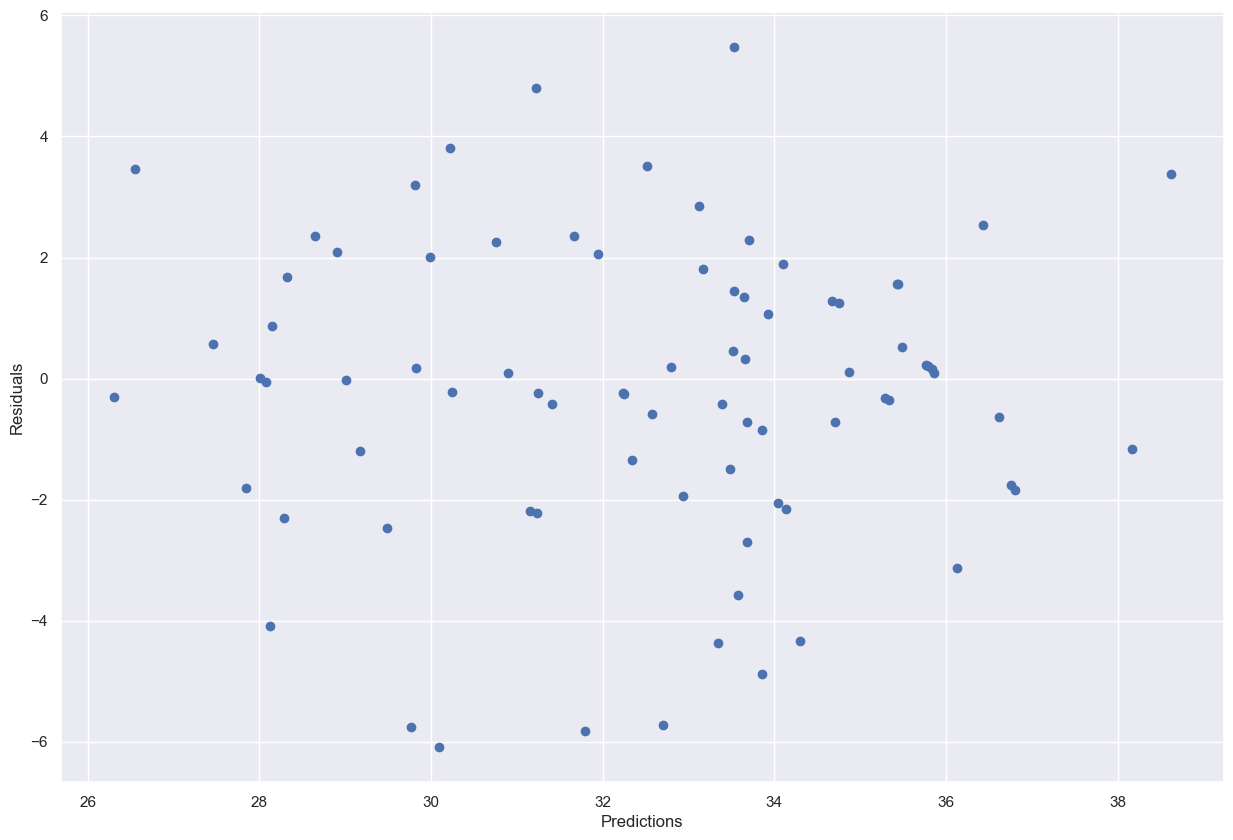

In [89]:
plt.scatter(x=ridge_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

### 9.2 Cost Function Values

In [90]:
print(f"MSE : {round(mean_squared_error(y_test, ridge_pred),2)}\nMAE :{round(mean_absolute_error(y_test, ridge_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_pred)),2)}")

MSE : 5.98
MAE :1.85
RMSE : 2.44


## 10 Performance Metrics

In [91]:
ridge_reg_r2_score=r2_score(y_test, ridge_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 56.832 % 
Adjusted R-Squared Accuracy : 49.95%


## 11 Lasso Regression Model

In [92]:
lasso=Lasso()

In [93]:
lasso.fit(X_train_scaled,y_train)

Lasso()

In [94]:
print(lasso.coef_)

[-1.14924065 -0.         -0.          0.          0.12231028  0.
  0.          0.          0.          0.          0.47252854]


In [95]:
print(lasso.intercept_)

[32.20000001]


##### Prediction of test data

In [96]:
lasso_pred = lasso.predict(X_test_scaled)

In [97]:
lasso_pred

array([32.08198146, 32.76499868, 33.34078452, 30.21306062, 30.27860898,
       33.24166837, 32.8693849 , 33.91663043, 31.18194196, 32.85878474,
       33.01513938, 32.63542916, 34.92542848, 31.65061652, 33.52810196,
       32.59474936, 30.28793665, 35.00430209, 31.55898713, 31.31056831,
       32.79850644, 33.32263862, 32.83905054, 32.5698808 , 30.97781116,
       31.84091372, 32.31066714, 31.96293749, 32.56613794, 32.77032877,
       32.36263555, 32.26510664, 34.13961228, 31.65784858, 31.21278468,
       30.29459926, 33.51128856, 31.94294963, 33.48013111, 33.92589911,
       33.47695663, 33.3986525 , 33.34770187, 33.55322522, 32.99223177,
       34.94998233, 33.11825311, 33.92913256, 31.27864778, 30.48565954,
       32.2703767 , 35.86607212, 31.31729096, 32.74234578, 30.10886908,
       34.56596083, 32.43300459, 32.17506344, 29.58314966, 32.50166739,
       32.0838824 , 31.75188935, 30.13018945, 33.88870747, 33.34662405,
       29.67427068, 32.40147342, 31.13955592, 34.18491809, 31.53

#### 11.1 Validation of Lasso Regression assumptions

##### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

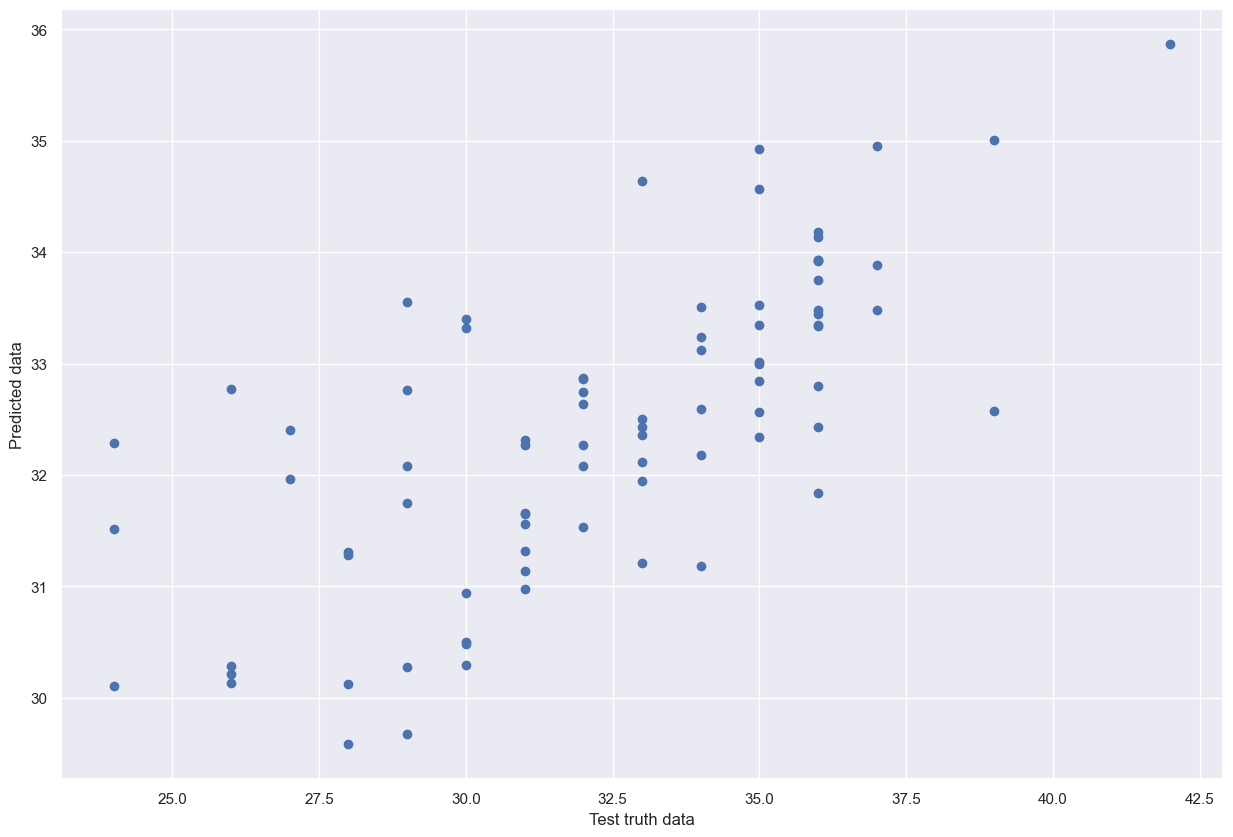

In [98]:
plt.scatter(x=y_test,y=lasso_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

##### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

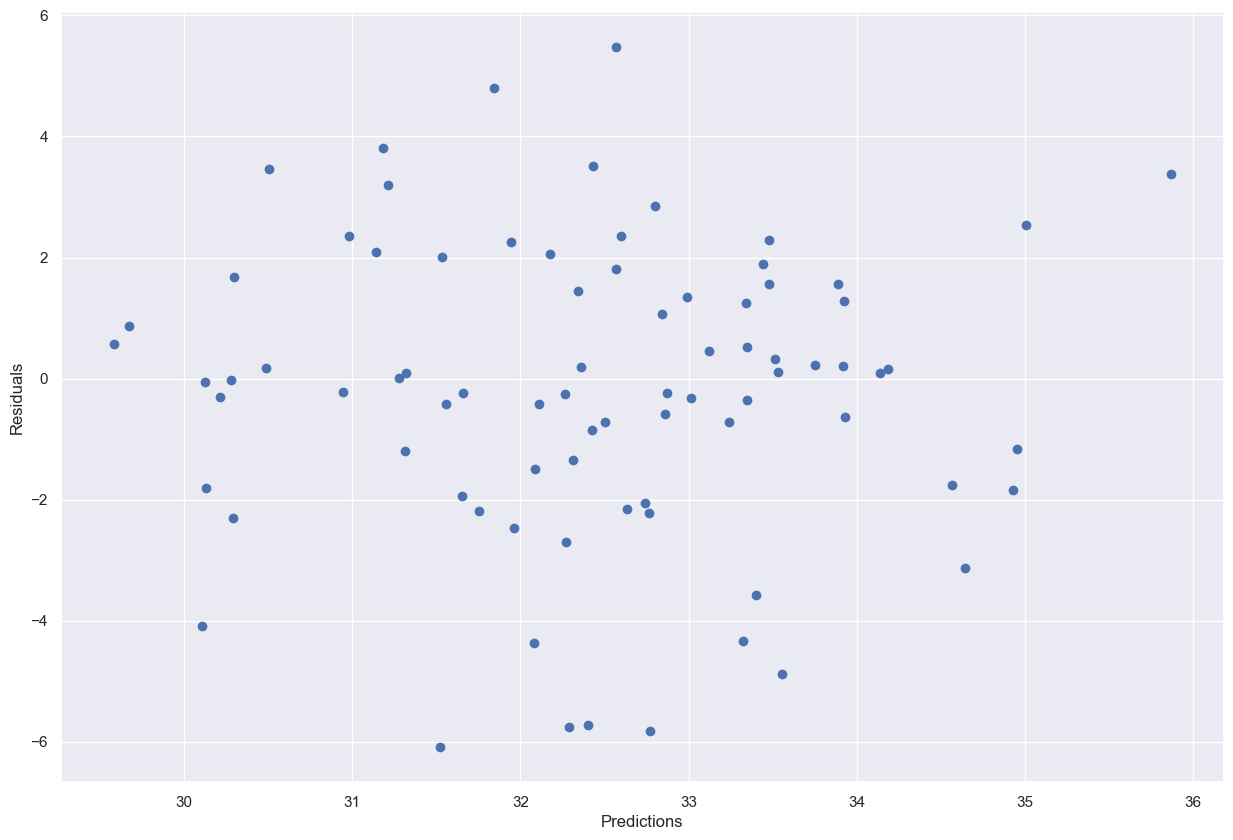

In [99]:
plt.scatter(x=lasso_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

#### Cost Function Values

In [100]:
lasso_mse=(mean_squared_error(y_test,lasso_pred))
lasso_mae=(mean_absolute_error(y_test,lasso_pred))
lasso_mse_sqrt=(np.sqrt(mean_squared_error(y_test,lasso_pred)))
print(lasso_mse)
print(lasso_mae)
print(lasso_mse_sqrt)

8.607108845393338
2.2806078281015494
2.9337874574333664


In [101]:
lasso_reg_r2_score=r2_score(y_test, lasso_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 37.823 % 
Adjusted R-Squared Accuracy : 27.91%


## 12 Elastic Net Regression Model

In [102]:
elastic_net=ElasticNet()

In [103]:
elastic_net.fit(X_train_scaled,y_train)

ElasticNet()

In [104]:
print(elastic_net.coef_)

[-0.83437862 -0.23341375 -0.          0.06660606  0.26400491  0.15177063
  0.          0.14016569  0.15979583  0.          0.5585239 ]


In [105]:
print(elastic_net.intercept_)

[32.20000001]


##### Prediction of test data

In [106]:
elastic_net_pred=elastic_net.predict(X_test_scaled)

In [107]:
elastic_net_pred

array([32.45578026, 32.48223738, 33.89285521, 29.13355203, 29.85831181,
       33.8517711 , 32.24849787, 34.62839354, 31.41277081, 32.07655737,
       33.08830987, 33.07790449, 34.82110667, 32.63825333, 33.43731292,
       32.75942178, 29.67179146, 34.88989509, 31.79018599, 30.50613052,
       32.60349368, 32.85428891, 33.57139679, 32.18165656, 30.27202234,
       32.0980732 , 32.02858558, 31.10478481, 32.25677768, 31.79794882,
       32.57732592, 32.25804983, 33.83638385, 31.93769215, 31.46345382,
       29.79161673, 32.81645558, 31.18078135, 33.68796792, 33.25435306,
       34.21172342, 33.34434719, 33.93039421, 33.26956941, 33.23539262,
       36.12287047, 32.57005995, 34.66194872, 30.34535744, 30.74111526,
       32.76840286, 36.48012216, 31.37168935, 33.08415145, 29.7932499 ,
       35.15020713, 32.81385222, 31.98816858, 29.50565926, 32.7005485 ,
       32.98807598, 31.19299208, 29.79577199, 34.49865018, 34.25158082,
       29.70596661, 32.06140484, 30.33774099, 34.68832716, 30.74

## 12.1 Validation of Elastic Regression assumptions

##### 1. Linear Relationship

Text(0, 0.5, 'Predicted data')

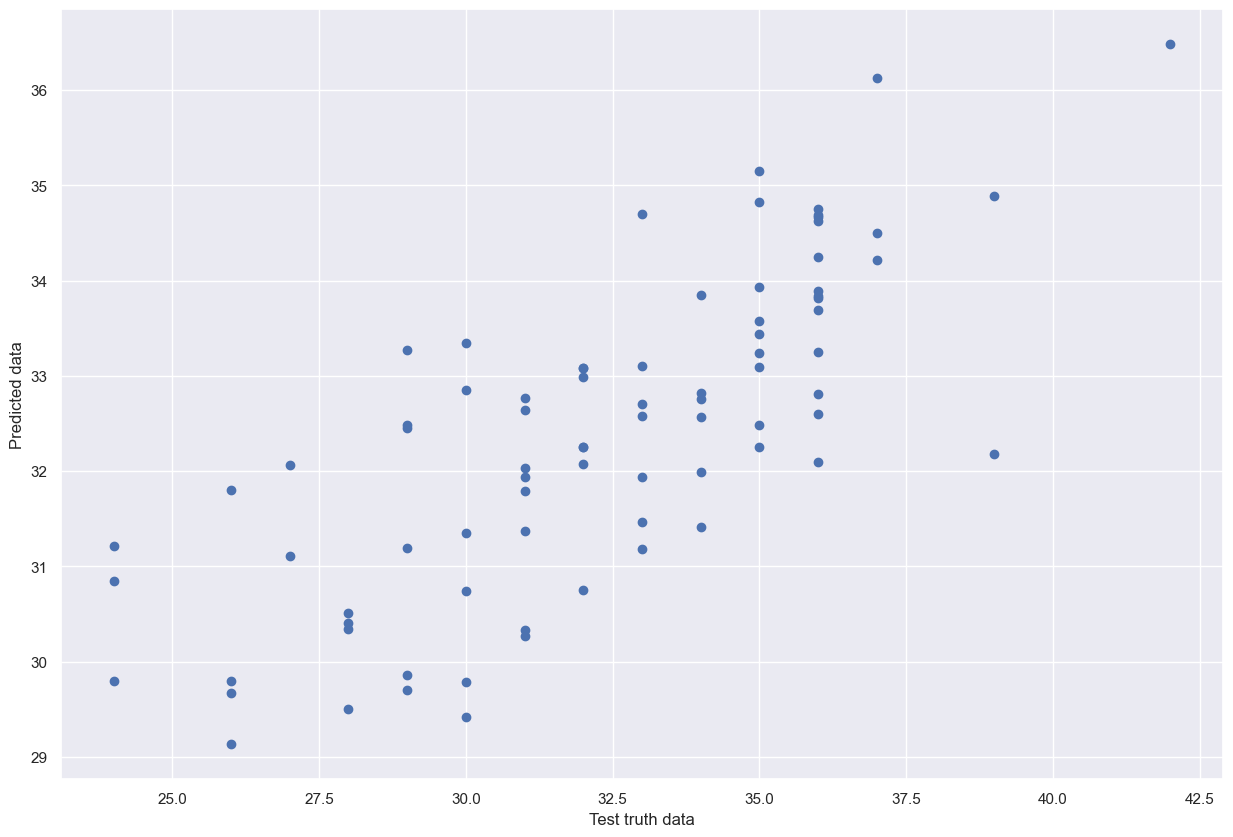

In [108]:
plt.scatter(x=y_test,y=elastic_net_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

##### 3. Residual and Predicted values should follow uniform distribution

Text(0, 0.5, 'Residuals')

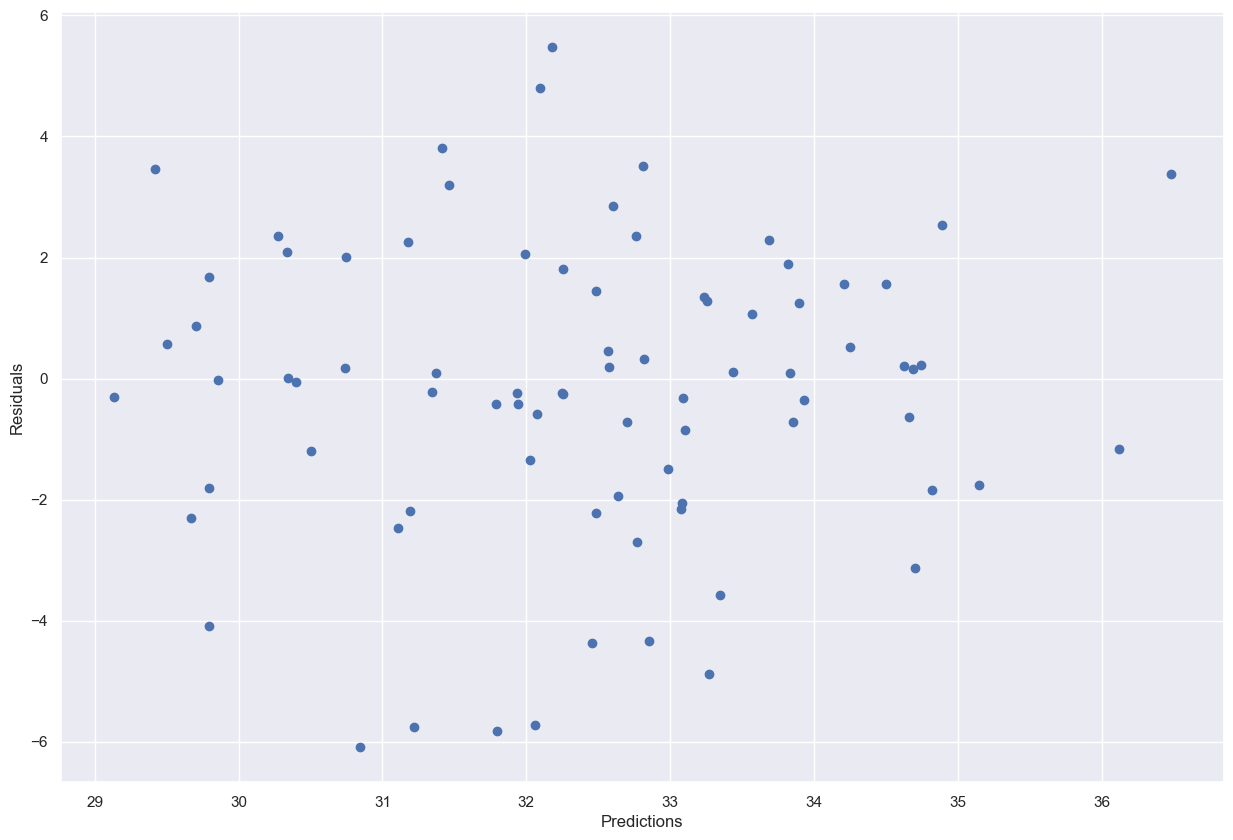

In [109]:
plt.scatter(x=elastic_net_pred,y=residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

#### 12.2 Cost Function Values

In [110]:
elastic_mse=(mean_squared_error(y_test,elastic_net_pred))
elastic_mae=(mean_absolute_error(y_test,elastic_net_pred))
elastic_mse_sqrt=(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))
print(elastic_mse)
print(elastic_mae)
print(elastic_mse_sqrt)

7.2271142271859565
2.1189350392381363
2.6883292631643836


In [111]:
elastic_score=r2_score(y_test,elastic_net_pred)
elastic_score

0.4779232728576913

In [112]:
elastic_ad_rsquare=1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
elastic_ad_rsquare

0.3946936496900768